# Постановвка задачи.
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить закономерности определяющие успешность игры. 


# 1. Подготовка данных.

## Описание вводных данных.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df_game = pd.read_csv('./games.csv')

In [36]:
df_game.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [37]:
df_game.columns = df_game.columns.str.lower()

In [38]:
df_game.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [39]:
df_game['name'] = df_game['name'].str.lower()

In [40]:
df_game['platform'] = df_game['platform'].str.lower()

In [41]:
df_game['genre'] = df_game['genre'].str.lower()

In [42]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [43]:
df_game.duplicated().sum()

0

In [44]:
df_game[['name', 'platform']].duplicated().sum()

5

In [45]:
df_game.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Описание данных
- *name* — название игры
- *platform* — платформа
- *year_of_release* — год выпуска
- *genre* — жанр игры
- *na_sales* — продажи в Северной Америке (миллионы долларов)
- *eu_sales* — продажи в Европе (миллионы долларов)
- *jp_sales* — продажи в Японии (миллионы долларов)
- *other_sales* — продажи в других странах (миллионы долларов)
- *critic_score* — оценка критиков (максимум 100)
- *user_score* — оценка пользователей (максимум 10)
- *rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

In [46]:
df_game['platform'].value_counts()

ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
nes       98
gb        98
dc        52
gen       29
ng        12
ws         6
scd        6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

In [47]:
df_game['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [48]:
df_game['genre'].value_counts()

action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64

In [49]:
df_game['critic_score'].value_counts().sort_index()

13.0     1
17.0     1
19.0     6
20.0     3
21.0     1
        ..
94.0    37
95.0    16
96.0    18
97.0    11
98.0     4
Name: critic_score, Length: 82, dtype: int64

In [50]:
df_game['user_score'].value_counts().sort_index()

0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: user_score, Length: 96, dtype: int64

In [51]:
df_game['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

#### Расшифровка параметров рейтинга.
**E** - Для всех (для детей от 6 лет)  
**T** - Подросткам (для детей от 13 лет)  
**M** - Для взрослых (для лиц старше 17 лет)  
**E10+** - Для детей от 10 лет  
**EC** - Для детей от 3-х лет  
**K-A** - Для всех (для детей от 6 лет)  
**RP** - Рейтинг ожидается  
**AO** - Только для взрослых  

In [52]:
df_game = df_game.replace('K-A', 'E')

In [53]:
df_game['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

### Вывод.
Рассмотрев возможные значения в столбцах видим, что в данных много единичных игровых платформ, которые уже не выпускаются или это онлайн платформы. В столбце *user_score* есть параметр *tbd*, он означает *To be announced*.  
В столбце *rating*  есть два равнозначных рейтинга *E* и *K-A*. Рейтинг *K-A* использовался до 1998г, затем был заменен на *E*, следовательно, мы тоже можем поменять его на *E*.  
Необходимо разобраться почему названия игр на одинаковых платформах дублируются и решить, что делать с пропусками.  

## Удаление дубликатов.

In [54]:
df_game['dupl'] = df_game[['name', 'platform']].duplicated()

In [55]:
df_game.query('dupl == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,dupl
1591,need for speed: most wanted,x360,2005.0,racing,1.0,0.13,0.02,0.10,83.0,8.5,T,True
4127,sonic the hedgehog,ps3,NaN,platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+,True
11715,need for speed: most wanted,pc,2012.0,racing,0.0,0.06,0.00,0.02,82.0,8.5,T,True
14244,NaN,gen,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN,True
16230,madden nfl 13,ps3,2012.0,sports,0.0,0.01,0.00,0.00,83.0,5.5,E,True


In [56]:
df_game.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,dupl
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T,False
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,False
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T,False
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T,True
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T,False
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,False
3581,need for speed: most wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T,False
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T,False
6273,need for speed: most wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,False
6410,need for speed: most wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E,False


In [57]:
df_game.query('name == "sonic the hedgehog"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,dupl
257,sonic the hedgehog,gen,1991.0,platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN,False
1745,sonic the hedgehog,ps3,2006.0,platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,False
1996,sonic the hedgehog,x360,2006.0,platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+,False
4127,sonic the hedgehog,ps3,NaN,platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,True


In [58]:
df_game.query('name == "madden nfl 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,dupl
507,madden nfl 13,x360,2012.0,sports,2.53,0.15,0.0,0.17,81.0,5.8,E,False
604,madden nfl 13,ps3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,E,False
3986,madden nfl 13,wii,2012.0,sports,0.47,0.00,0.0,0.03,NaN,7.3,E,False
5887,madden nfl 13,psv,2012.0,sports,0.28,0.00,0.0,0.02,63.0,7.3,E,False
7066,madden nfl 13,wiiu,2012.0,sports,0.21,0.00,0.0,0.02,75.0,6.7,E,False
16230,madden nfl 13,ps3,2012.0,sports,0.00,0.01,0.0,0.00,83.0,5.5,E,True


In [59]:
df_game = df_game.drop([4127, 16230], axis = 0)

In [60]:
df_game = df_game.dropna(subset = ['name'])

In [61]:
df_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,dupl
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,False
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,False
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,False
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,False
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,False
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,False


In [62]:
df_game = df_game.drop('dupl', axis = 1)

In [63]:
df_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [64]:
df_game = df_game.reset_index(drop = True)

#### Вывод.
Мы нашли дубликаты по названию и платформе в двух играх *sonic the hedgehog* и *madden nfl 13*. Дублирующиеся строки мы удалили. В игре *need for speed: most wanted* хоть и есть повторящиеся строки, но у них разный год, т.к. эта игра переиздавалась.   
Так же удалили строки с пустыми значениями в столбце *name*, т.к. игры без названия и пустых рейтингов нас не интересуют.

## Удаление пропусков.

In [65]:
df_game.isna().sum()

name                  0
platform              0
year_of_release     268
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [66]:
df_game = df_game.dropna(subset = ['year_of_release'])

In [67]:
df_game['year_of_release'] = df_game['year_of_release'].astype('int')

In [68]:
df_game['rating'] = df_game['rating'].fillna('RP')

In [69]:
df_game['user_score'] = df_game['user_score'].fillna('tbd')

In [70]:
df_game['critic_score'] = df_game['critic_score'].fillna('tbd')

In [71]:
df_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,tbd,tbd,RP
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,tbd,tbd,RP


In [72]:
df_game.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Вывод.
Так как для нас важен год выпуска игр, то мы удалим строки с пустыми значениями в столбце *year_of_release*, на этом мы потеряем не много данных, около 1,5%. И преобразуем тип данных в этом столбце в *integer*.  
Пустые ячейки в столбце *year_of_release* оставим незаполненными. Т.к. эти параметр не с чем связать. Если потребуется, то эту информацию можно найти в интернете.   
Пустые ячейки в солбце *rating* заменим на рейтинг *RP*, как "рейтинг определяется".  
Пустые ячейки в солбце *user_score* заменим на *tbd*.  
По аналогии с оценкой пользователей, заполним пустые значения в столбце оценки критиков на *tbd*.

### Cуммарные продажи во всех регионах.

In [73]:
df_game['all_sales'] = df_game['na_sales'] + df_game['eu_sales'] + df_game['jp_sales'] + df_game['other_sales']

In [74]:
df_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,tbd,tbd,RP,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,tbd,tbd,RP,31.38


В солбец *other_sales* записали общие продажи.

# 2. Исследовательский анализ данных

##### Посмотрим общую динамику по производству игр.

Text(0, 0.5, 'Количество выпущенных игр')

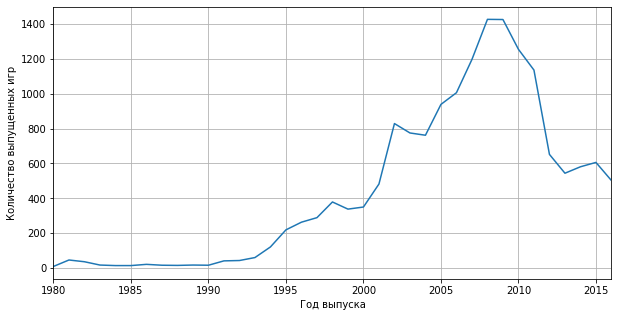

In [75]:
ycnt = df_game.groupby('year_of_release')['name'].count().plot(grid = True, figsize = (10,5))
ycnt.set_xlabel('Год выпуска')
ycnt.set_ylabel('Количество выпущенных игр')

#### Вывод.
Видно, что игры начали массово выпускаться после 1992г и выпуск постоянно рос до 2007г, после этого года идет постоянный спад в производстве игр.

##### Сравним какие платформы наиболее продаваемы.

In [76]:
df_game.groupby('platform')['all_sales'].sum().sort_values(ascending = False)

platform
ps2     1233.56
x360     961.24
ps3      931.33
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
gb       254.43
xb       251.57
nes      251.05
n64      218.01
snes     200.04
gc       196.73
xone     159.32
2600      86.48
wiiu      82.19
psv       53.81
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: all_sales, dtype: float64

In [77]:
top_platform = df_game.groupby('platform')['all_sales'].sum().sort_values(ascending = False).head(18)

In [78]:
top_platform 

platform
ps2     1233.56
x360     961.24
ps3      931.33
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
gb       254.43
xb       251.57
nes      251.05
n64      218.01
snes     200.04
gc       196.73
xone     159.32
Name: all_sales, dtype: float64

Text(0, 0.5, 'Суммарные продажи в год')

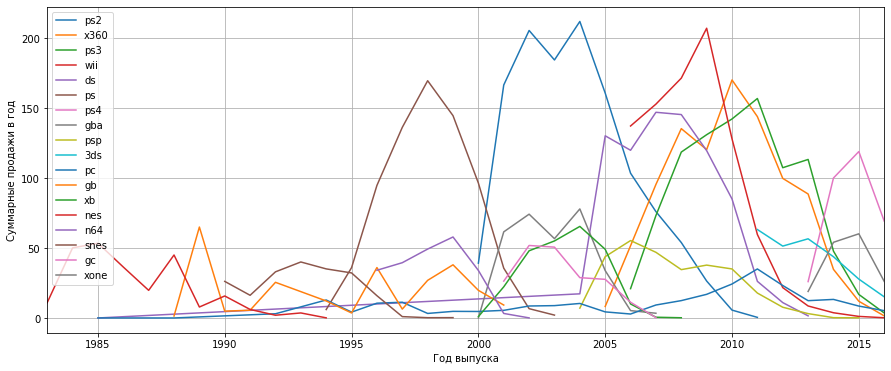

In [79]:
for pl in top_platform.index:
    s_sale = df_game.query('platform == @pl').groupby('year_of_release')['all_sales'].sum().plot(
        grid = True, figsize = (15,6), label = pl)
plt.legend()
s_sale.set_xlabel('Год выпуска')
s_sale.set_ylabel('Суммарные продажи в год')

#### Вывод.
Все платформы которые имели максимальные продажи сейчас уже не актуальны и продажи по ним идут на спад.   
Каждая прибыльная платформа имела акутальность около 7 лет.

В дальнейшем анализе будем рассматривать игры производимы начиная с 2014г. Т.к. в этом году был небольшой подъем по производству игр, и с этого года начинают набирать популярность новые платформы, в то время как продажи старых платформ почти пропали.

Выделим отдельную таблицу, где будут игры выпущенные после 2014г.

In [80]:
df_game14 = df_game.query('year_of_release >= 2014')

In [81]:
df_game14

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,tbd,tbd,RP,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,tbd,tbd,RP,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,tbd,tbd,RP,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,tbd,tbd,RP,0.01
16703,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,tbd,tbd,RP,0.01
16706,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,tbd,tbd,RP,0.01
16708,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,tbd,tbd,RP,0.01


In [82]:
top14 = df_game14.groupby('platform')['all_sales'].sum().sort_values(ascending = False)

In [83]:
top14

platform
ps4     288.15
xone    140.36
3ds      86.68
ps3      68.18
x360     48.22
wiiu     42.98
pc       27.05
psv      22.40
wii       5.07
psp       0.36
Name: all_sales, dtype: float64

Text(0, 0.5, 'Суммарные продажи в год')

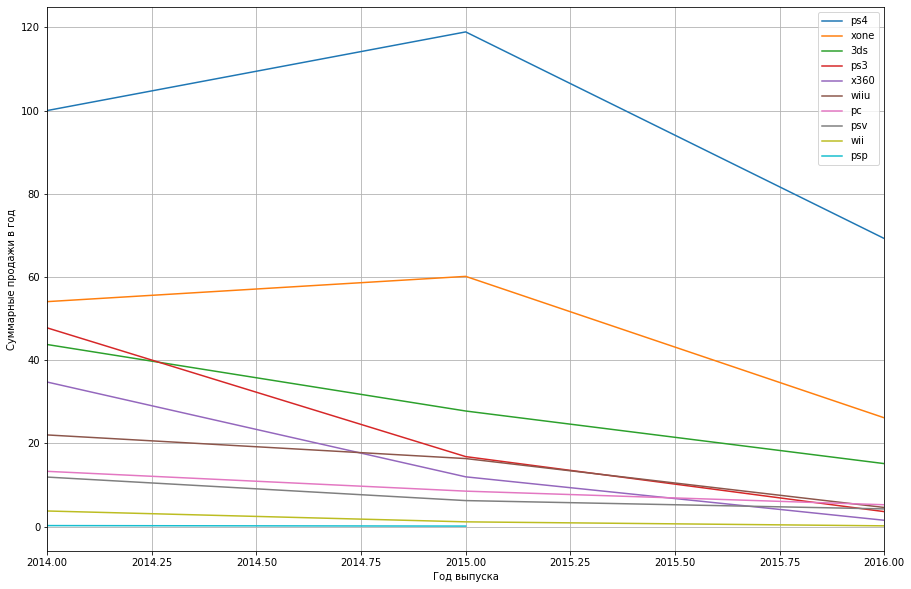

In [84]:
for pl in top14.index:
    s_sale = df_game14.query('platform == @pl').groupby('year_of_release')['all_sales'].sum().plot(
        grid = True, figsize = (15,10), label = pl)
plt.legend()
s_sale.set_xlabel('Год выпуска')
s_sale.set_ylabel('Суммарные продажи в год')

В 2016 году у всех платформ спад в продже, но в 2015 был небольшой рост у PS4 и XONE.

Посмотрим как росло/убывло количество выпущеных игр.

Text(0, 0.5, 'Количество выпущенных игр в год')

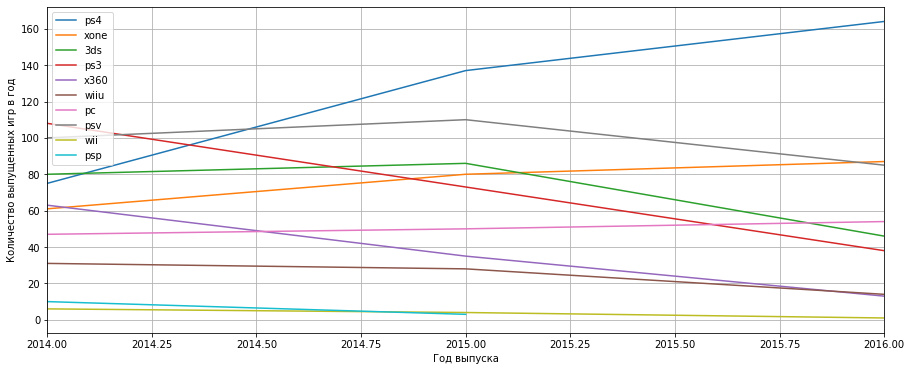

In [85]:
for pl in top14.index:
    c_sale = df_game14.query('platform == @pl').groupby('year_of_release')['all_sales'].count().plot(
        grid = True, figsize = (15,6), label = pl)
plt.legend()
c_sale.set_xlabel('Год выпуска')
c_sale.set_ylabel('Количество выпущенных игр в год')

Постоянно растет производство игр для платформ PS4, XONE  и PC. У остальных в 2016г произошел спад.

#### Вывод.
Можно выделить три платформы, это PS4, XONE, WIIU и PC. 3DS имеет не плохие цифры по продажам, но у нее продажи два года падают и в 2016 годы сильно упало количество производимых игр, что показывает не лучшие перспективы.   
Платформа PC хоть и имеет небольшие продажи, но они стабильны и производство игр с каждым годом растет.  
Платформа WIIU визуально имеет наименьший спад в продажах и произодство игр сократилось не сильно.

##### Сравним платформы.

Text(0, 0.5, 'Платформа')

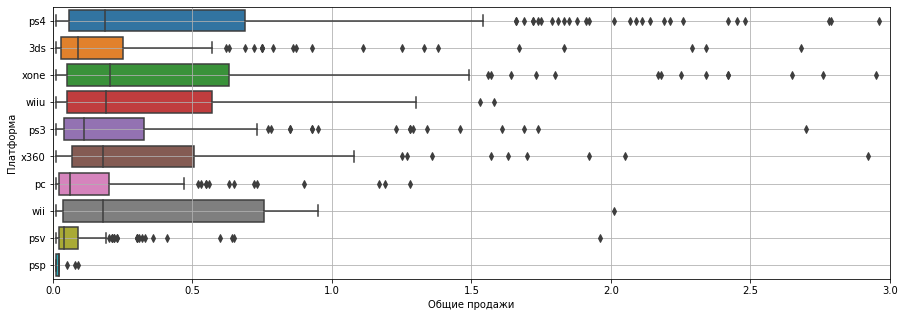

In [86]:
plt.subplots(figsize=(15,5))
plat = sns.boxplot(data = df_game14, y='platform', x='all_sales', orient='h')
plat.grid(True)
plat.set(xlim=(0,3))
plat.set_xlabel('Общие продажи')
plat.set_ylabel("Платформа")

Text(0, 0.5, 'Общие средние продажи')

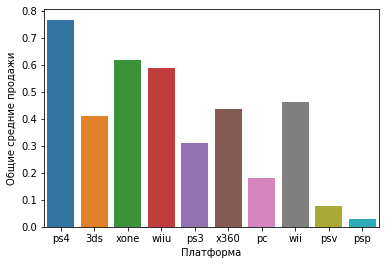

In [87]:
plat_m = sns.barplot(data = df_game14, x='platform', y='all_sales', ci = None)
plat_m.set_xlabel('Платформа')
plat_m.set_ylabel("Общие средние продажи")

#### Вывод.
5 платформ имеют примерно равное медианное значение по продажам игр, это: ps4, xone, wiiu, x360, wii. Эти же платформы имеют самые большие границы размаха, в лидерах по этому показателю ps4 и xone. Wii имеет самую большую плотность значений, хоть граница размаха у нее не сама большая, но 3ий квартиль у нее самый большой.  
У ps4, xone, wiiu самый большой разброс продажам игр. В этом плане самым выгодным является платформа wii, у нее практически все игры имеют один диапазон продаж.  
По средним продажам в лидерах та же пятерка платформ: ps4, xone, wiiu, x360, wii.  
На основе проведенного анализа выберем три платформы как потенциально прибыльные, это **ps4, xone, wiiu**

##### Рассмитрим, как влияют на продажи отзывы критиков и пользователей.  
Рассматривать будем на примере платформы PS4.

Выделим отдельно таблцу по платформе ps4, где параметры *critic_score*, *user_score* не равны *tbd*

In [88]:
ps4 = df_game14.query('platform == "ps4" and critic_score != "tbd" and user_score != "tbd"')

In [89]:
ps4['critic_score'] = pd.to_numeric(ps4['critic_score'])

C:\Users\aivol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
ps4['user_score'] = pd.to_numeric(ps4['user_score'])

C:\Users\aivol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


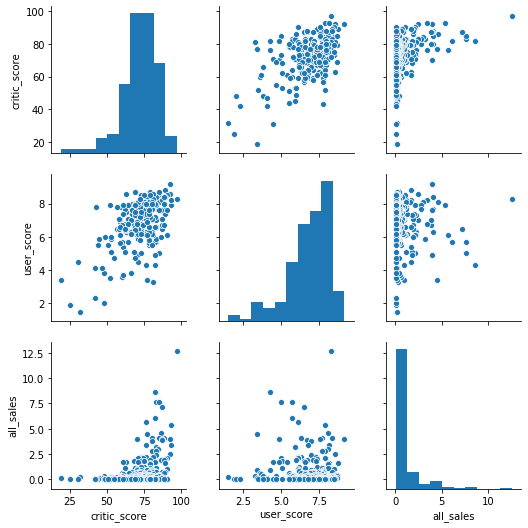

In [91]:
ax_ps4 = sns.pairplot(ps4[['critic_score', 'user_score', 'all_sales']])

In [92]:
ps4[['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.546434,0.401903
user_score,0.546434,1.000000,-0.043186
all_sales,0.401903,-0.043186,1.000000


#### Вывод.
Из диаграммы рассеивания видно, что отзывы критиков имеют более сильное влияние на продажи игр, чем отзывы пользователей. Это подтверждает и коэффициент корреляции, у критиков = 0.4, а у пользователей = -0.04. В это же время отзывы критиков и пользователей зависимы между собой.

##### Проверим эту зависимость на других платформах.

###### xone

In [93]:
xone = df_game14.query('platform == "xone" and critic_score != "tbd" and user_score != "tbd"')
xone['critic_score'] = pd.to_numeric(xone['critic_score'])
xone['user_score'] = pd.to_numeric(xone['user_score'])

C:\Users\aivol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aivol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


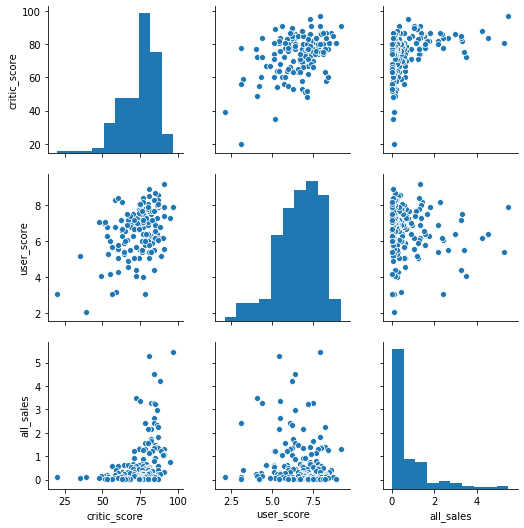

In [94]:
ax_xone = sns.pairplot(xone[['critic_score', 'user_score', 'all_sales']])

In [95]:
xone[['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.440977,0.422112
user_score,0.440977,1.000000,-0.091734
all_sales,0.422112,-0.091734,1.000000


###### wiiu

In [96]:
wiiu = df_game14.query('platform == "wiiu" and critic_score != "tbd" and user_score != "tbd"')
wiiu['critic_score'] = pd.to_numeric(wiiu['critic_score'])
wiiu['user_score'] = pd.to_numeric(wiiu['user_score'])

C:\Users\aivol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aivol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


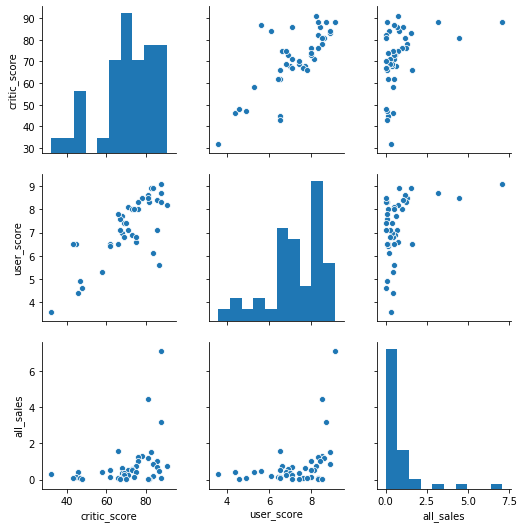

In [97]:
ax_wiiu = sns.pairplot(wiiu[['critic_score', 'user_score', 'all_sales']])

In [98]:
wiiu[['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.763536,0.375640
user_score,0.763536,1.000000,0.411451
all_sales,0.375640,0.411451,1.000000


#### Вывод.
В итоге мы видим что зависить общих продаж от отзывов критиков прослеживается в играх каждой платформы.

##### Рассмотрим продажи игр по жанрам

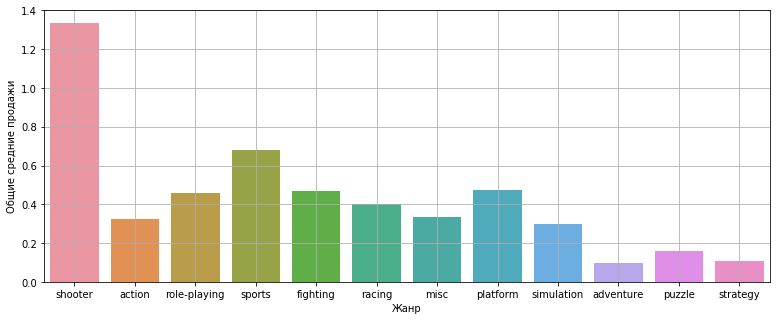

In [99]:
plt.subplots(figsize=(13,5))
ganr = sns.barplot(data= df_game14, x='genre', y='all_sales', ci = None)
ganr.set_xlabel('Жанр')
ganr.set_ylabel('Общие средние продажи')
ganr.grid(True)

Text(0, 0.5, 'Жанр')

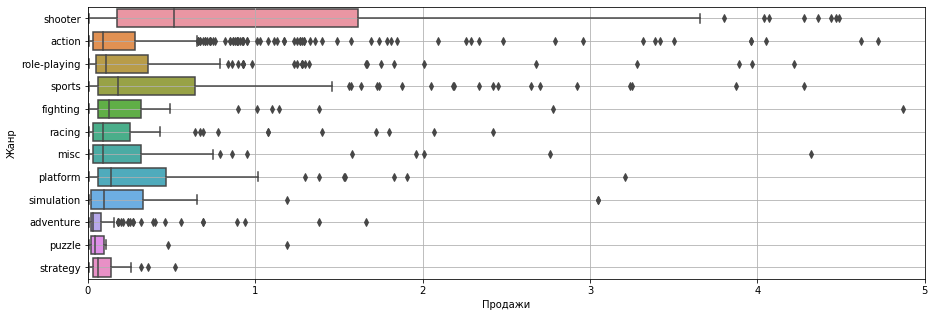

In [100]:
plt.subplots(figsize=(15,5))
allg = sns.boxplot(data = df_game14, y='genre', x='all_sales', orient='h')
allg.grid(True)
allg.set(xlim=(0,5))
allg.set_xlabel('Продажи')
allg.set_ylabel('Жанр')

#### Вывод.
С большим отрывом по продажам лидируют игры в жанре шутер, у них же самый большой разброс продаж. Потом идут спортивные игры, платформеры, симуляторы, бои, ролевые игры, гонки, жанры misc и action.  
Наименьшей популярностью пользуются приключения, стратегии и пазлы.

# 3. Анализ пользователей по регионам.

In [101]:
print('Доля продаж компьютерных игр в Северной Америке: {:.2%}'.
      format(df_game14['na_sales'].sum()/df_game14['all_sales'].sum()))
print('Доля продаж компьютерных игр в Европе: {:.2%}'.
      format(df_game14['eu_sales'].sum()/df_game14['all_sales'].sum()))
print('Доля продаж компьютерных игр в Японии: {:.2%}'.
      format(df_game14['jp_sales'].sum()/df_game14['all_sales'].sum()))
print('Доля продаж компьютерных игр в остальных странах: {:.2%}'.
      format(df_game14['other_sales'].sum()/df_game14['all_sales'].sum()))

Доля продаж компьютерных игр в Северной Америке: 38.94%
Доля продаж компьютерных игр в Европе: 37.11%
Доля продаж компьютерных игр в Японии: 12.76%
Доля продаж компьютерных игр в остальных странах: 11.19%


### Северная Америка.

Text(0, 0.5, 'Средние продажи')

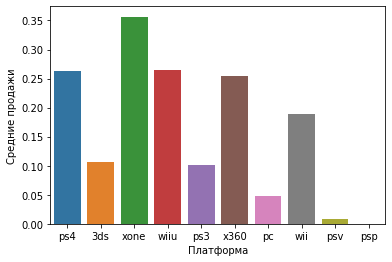

In [102]:
na = sns.barplot(data = df_game14, x='platform', y='na_sales', ci = None)
na.set_xlabel('Платформа')
na.set_ylabel('Средние продажи')

Text(0, 0.5, 'Платформа')

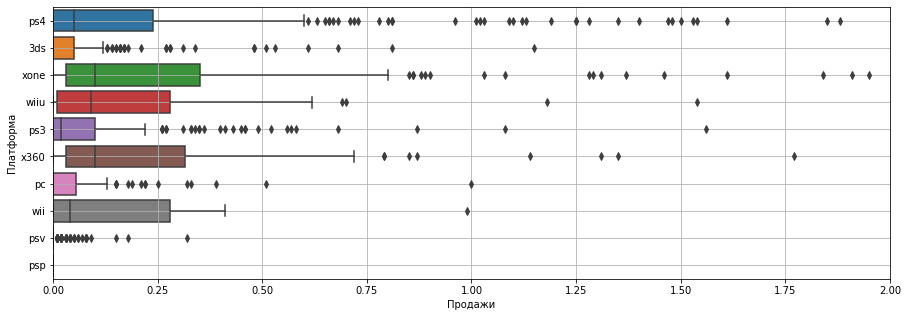

In [103]:
plt.subplots(figsize=(15,5))
nab = sns.boxplot(data = df_game14, y='platform', x='na_sales', orient='h')
nab.grid(True)
nab.set(xlim=(0,2))
nab.set_xlabel('Продажи')
nab.set_ylabel("Платформа")

In [104]:
top5plna = ['xone', 'x360', 'wiiu', 'ps4', 'wii']

In [105]:
print('Год начала выпуска игр на платформах:')
df_game.query('platform in @top5plna').pivot_table(index = 'platform', values = 'year_of_release', aggfunc='min')

Год начала выпуска игр на платформах:


,year_of_release
platform,
ps4,2013
wii,2006
wiiu,2012
x360,2005
xone,2013


В Cеверной Америке наиболее популярна платформа xone. Топ 5 платформ: xone, x360, wiiu, ps4, wii. Ps4 хоть и имеет большую средюю продажу, но медианное значение у нее намного меньше чем у x360, wii.    
В отличае от общеировой статистики ps4 не имеет выделяющихся продаж по сравнению с другими топовыми платформами. Американцы лучше покупают игры на своих платформах. 
Ранее мы выяснили что в срденем игровые платформы имеют актуальность в течение 7 лет, следовательно в 2017 году платформы wii и x360 будут не интересны пользователям.

Text(0, 0.5, 'Средние продажи')

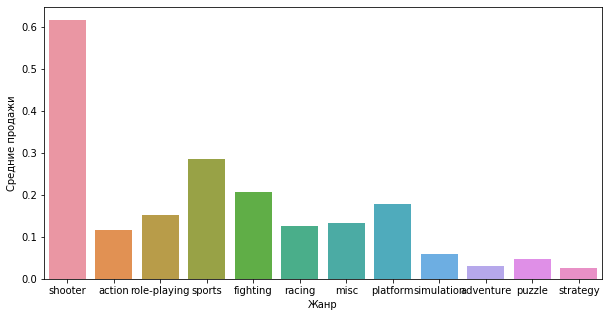

In [106]:
plt.subplots(figsize=(10,5))
nag = sns.barplot(data = df_game14, x='genre', y='na_sales', ci = None)
nag.set_xlabel('Жанр')
nag.set_ylabel('Средние продажи')

Text(0, 0.5, 'Жанр')

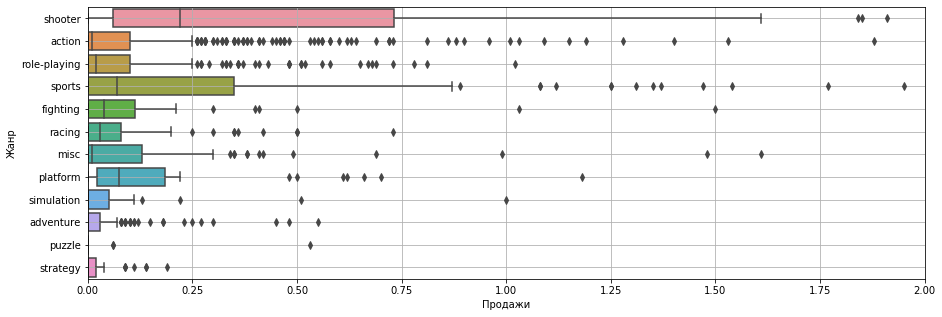

In [107]:
plt.subplots(figsize=(15,5))
nag = sns.boxplot(data = df_game14, y='genre', x='na_sales', orient='h')
nag.grid(True)
nag.set(xlim=(0,2))
nag.set_xlabel('Продажи')
nag.set_ylabel("Жанр")

Рейтинг по жанрам похож на общий. Шутеры сильно лидируют, за ними слудеют по продоваемости спортивные игры, бои, платформеры и ролевые игры. У шутеров и платформеров, есть явное отличие от остальных жанров, у них нижний квартиль больше нуля, это значит что вероятность не нулевой продажи игр у этих жанров больше чем у остальных.

Text(0, 0.5, 'Средние продажи')

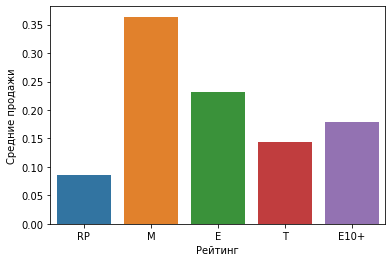

In [108]:
nar = sns.barplot(data = df_game14, x='rating', y='na_sales', ci = None)
nar.set_xlabel('Рейтинг')
nar.set_ylabel('Средние продажи')

Рейтинг сильно влияет на продажи. В Северно Америке сильно лидируют игры для взрослых, это и понятно, они любят шутеры и бои. На втором месте по популярности это игры от 6 лет, к ним относят такие популярные жанры как спорт, платформеры и гонки.

#### Вывод.
В Северной Америке больше всего любят играть в шутеры, спортивные игры, бои, платформеры и ролевые игры, статистика по рйтингу игр это подтверждает. В качестве игровых плаформ стоит выбрать xone, wiiu, ps4.

### Европа

Text(0, 0.5, 'Средние продажи')

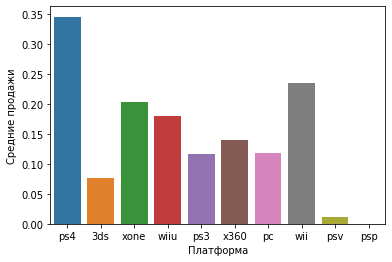

In [109]:
eu = sns.barplot(data = df_game14, x='platform', y='eu_sales', ci = None)
eu.set_xlabel('Платформа')
eu.set_ylabel('Средние продажи')

Text(0, 0.5, 'Платформа')

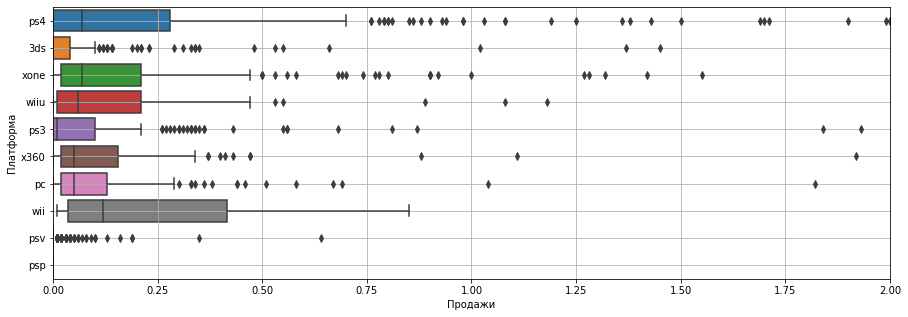

In [110]:
plt.subplots(figsize=(15,5))
eub = sns.boxplot(data = df_game14, y='platform', x='eu_sales', orient='h')
eub.grid(True)
eub.set(xlim=(0,2))
eub.set_xlabel('Продажи')
eub.set_ylabel("Платформа")

В Европе наиболее успешны игры на платформe wii, у нее единственной нижний ус больше нуля, это значит что почти все игры на этой платформе приносят прибыль. Топ 5 игровых платформ в Европе: wii, ps4, xone, wiiu, x360. Список топовых платформ в Европе такой же как в Америке, так же в 2017 году платформы wii и x360 будут не актуальны.

Text(0, 0.5, 'Средние продажи')

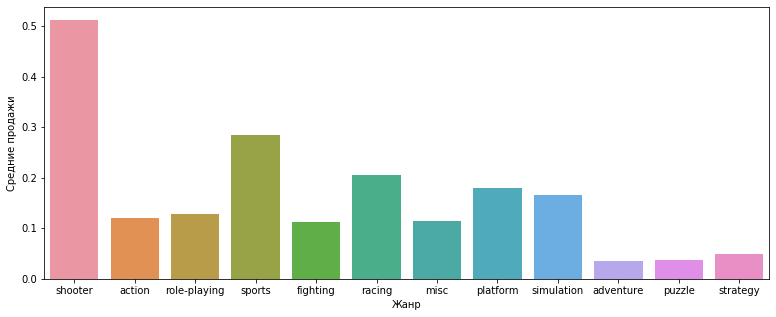

In [111]:
plt.subplots(figsize=(13,5))
eug = sns.barplot(data = df_game14, x='genre', y='eu_sales', ci = None)
eug.set_xlabel('Жанр')
eug.set_ylabel('Средние продажи')

Text(0, 0.5, 'Жанр')

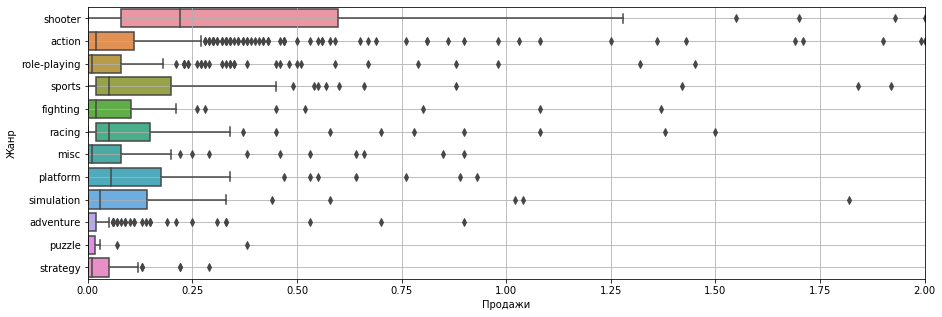

In [112]:
plt.subplots(figsize=(15,5))
eug = sns.boxplot(data = df_game14, y='genre', x='eu_sales', orient='h')
eug.grid(True)
eug.set(xlim=(0,2))
eug.set_xlabel('Продажи')
eug.set_ylabel("Жанр")

По жанрам так же лидирую шутеры. В топ-5 так же входят спорт, гонки, платформеры и симуляторы.

Text(0, 0.5, 'Средние продажи')

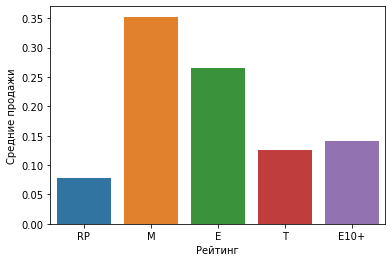

In [113]:
eur = sns.barplot(data = df_game14, x='rating', y='eu_sales', ci = None)
eur.set_xlabel('Рейтинг')
eur.set_ylabel('Средние продажи')

По рейтингу лидируют игры для взрослых, видимо из-за шутеров. В Европе большей популярностью чем в Америке пользуются игры для детей от 6 лет.

#### Вывод.
Игровые платформы в Европе на которые надо делать упор: ps4, xone, wiiu. По играм ставку нужно сделать на шутеры, спорт, гонки, платформеры и симуляторы. Особенно можновыделить три жанра: шутеры, спорт и гонки, у них нижний квартиль больше нуля, это значит что игры этих жанров с большей вероятностью принесут прибыль. В Европе, так же как и в Америке, пользователи смотрят на возрастной рейтинг игры.

### Япония.

Text(0, 0.5, 'Средние продажи')

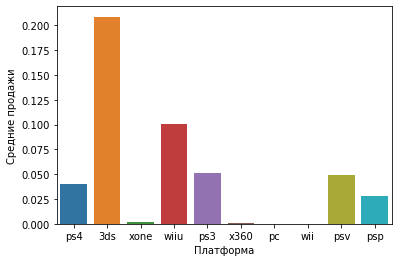

In [114]:
jp = sns.barplot(data = df_game14, x='platform', y='jp_sales', ci = None)
jp.set_xlabel('Платформа')
jp.set_ylabel('Средние продажи')

Text(0, 0.5, 'Платформа')

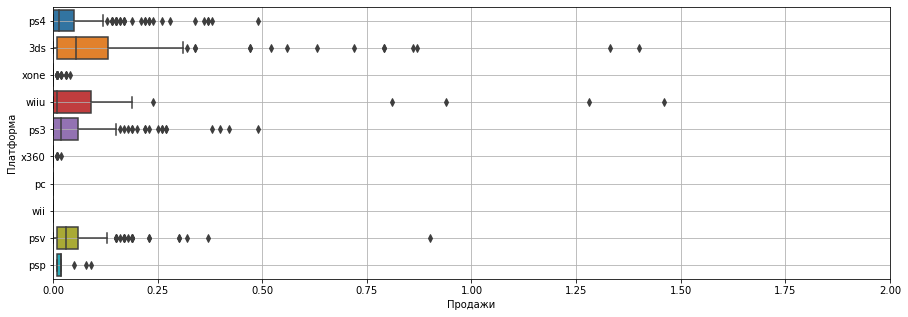

In [115]:
plt.subplots(figsize=(15,5))
jpb = sns.boxplot(data = df_game14, y='platform', x='jp_sales', orient='h')
jpb.grid(True)
jpb.set(xlim=(0,2))
jpb.set_xlabel('Продажи')
jpb.set_ylabel("Платформа")

In [116]:
top5pljp = ['3ds', 'psv', 'ps3', 'ps4', 'wiiu']

In [117]:
print('Год начала выпуска игр на платформах:')
df_game.query('platform in @top5pljp').pivot_table(index = 'platform', values = 'year_of_release', aggfunc='min')

Год начала выпуска игр на платформах:


,year_of_release
platform,
3ds,2011
ps3,2006
ps4,2013
psv,2011
wiiu,2012


Япония кардинально отличается от Америки и Европы, платформы xone и x360 имеют минимальные продажи, в то время как 3ds пользуется огромной популярностью по отношению к другим платформам. Топ 5 платформ - 3ds, psv, ps3, ps4, wiiu.   
Платформа wiiu хоть и имеет большое среднее значение по прадажам, но у нее самая низкая медивана из топ 5 платформ, поэтому мы поставили ее на последнее место в этом рейтинге. Платформа ps3 в 2017 году будет не актуальна.

Text(0, 0.5, 'Средние продажи')

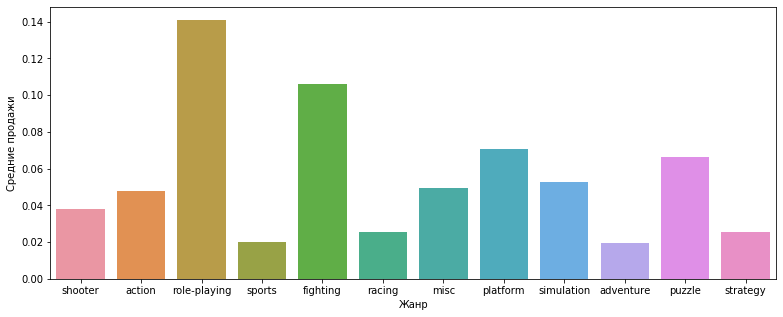

In [118]:
plt.subplots(figsize=(13,5))
jpg = sns.barplot(data = df_game14, x='genre', y='jp_sales', ci = None)
jpg.set_xlabel('Жанр')
jpg.set_ylabel('Средние продажи')

Text(0, 0.5, 'Жанр')

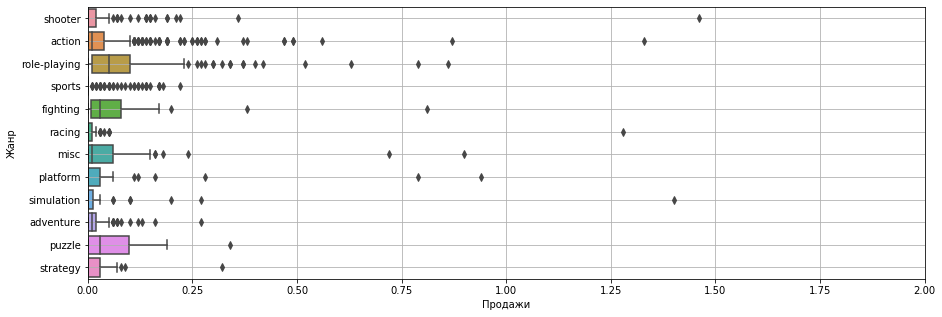

In [119]:
plt.subplots(figsize=(15,5))
jpg = sns.boxplot(data = df_game14, y='genre', x='jp_sales', orient='h')
jpg.grid(True)
jpg.set(xlim=(0,2))
jpg.set_xlabel('Продажи')
jpg.set_ylabel("Жанр")

Рынок игр так же отличается. Шутеры не интересны в Японии. Топ 5 жанров - ролевые игры, бои, пазлы, симуляторы и жанр misc

Text(0, 0.5, 'Средние продажи')

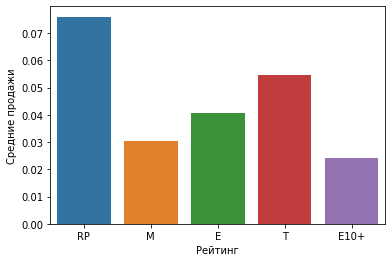

In [120]:
jpr = sns.barplot(data = df_game14, x='rating', y='jp_sales', ci = None)
jpr.set_xlabel('Рейтинг')
jpr.set_ylabel('Средние продажи')

In [121]:
df_game14.query('rating == "RP"')['genre'].value_counts()

action          296
adventure       136
role-playing    114
misc             61
sports           29
strategy         24
simulation       22
fighting         22
shooter          17
racing           16
puzzle            7
platform          5
Name: genre, dtype: int64

Японцы не делают акцент на рейтинг игры, в большинстве случаев покупают игры без рейтинга.

#### Вывод.
Рынок игр в Японии заметно отличается от Америки и Европы, можно сказать здесь продаются игры только на Японских платформах. Продажи нужно ориентировать на платформы: 3ds, psv, ps4, wiiu.   
Здесь не любят шутеры, но очень любят ролевые игры. Топ 5 жанров игр - ролевые игры, бои, пазлы, симуляторы и жанр misc.  
В Японии не смотрят на рейтинг игр, зачастую покупают игры без рейтинга.

# 4. Проверка гипотез.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

За нулевую гипотезу примем что рейтинги платформ одинаковые. За альтернативную, что рейтинги не одинаковые.  
Для оценки будем использовать критерий основанный на распределниях Стьюдента, т.к. он позволяет найти вероятность того, что оба средних значения в выборке относятся к одной и той же совокупности.

In [122]:
u_score = df_game14.query('user_score != "tbd"') 
u_score['user_score'] = pd.to_numeric(u_score['user_score'])

C:\Users\aivol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
from scipy import stats as st

In [124]:
alpha = 0.05

In [125]:
result1 = st.ttest_ind(u_score.query('platform == "xone"')['user_score'], u_score.query('platform == "pc"')['user_score'])

In [126]:
if result1.pvalue < alpha:
    print('Средние пользовательские рейтинги платформ Xbox One и PC различается')
else:
    print('Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
print('p-значение:', result1.pvalue)

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
p-значение: 0.10450507919348415


In [127]:
print('Средний пользовательский рейтинг платформы Xbox One: {:.2f}'.
      format(u_score.query('platform == "xone"')['user_score'].mean()))
print('Средний пользовательский рейтинг платформы Xbox One: {:.2f}'.
      format(u_score.query('platform == "pc"')['user_score'].mean()))

Средний пользовательский рейтинг платформы Xbox One: 6.59
Средний пользовательский рейтинг платформы Xbox One: 6.30


#### Вывод.
Нулева гипотеза подтвердилась, ***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые***

### Средние пользовательские рейтинги жанров Action и Sports разные.

За нулевую гипотезу примем что рейтинги жанров  Action и Sports одинаковые. За альтернативную, что рейтинги не одинаковые.  

In [128]:
result2 = st.ttest_ind(u_score.query('genre == "action"')['user_score'], u_score.query('genre == "sports"')['user_score'])

In [129]:
if result2.pvalue < alpha:
    print('Средние пользовательские рейтинги жанров Action и Sports различается')
else:
    print('Средние пользовательские рейтинги жанров Action и Sports одинаковые')
print('p-значение:', result2.pvalue)

Средние пользовательские рейтинги жанров Action и Sports различается
p-значение: 2.8711147985105864e-19


In [130]:
print('Средний пользовательский рейтинг игр жанра Action: {:.2f}'.
      format(u_score.query('genre == "action"')['user_score'].mean()))
print('Средний пользовательский рейтинг игр жанра Sports: {:.2f}'.
      format(u_score.query('genre == "sports"')['user_score'].mean()))

Средний пользовательский рейтинг игр жанра Action: 6.76
Средний пользовательский рейтинг игр жанра Sports: 5.23


#### Вывод.
Нулевая гипотеза не подтвердилась, ***Средние пользовательские рейтинги жанров Action и Sports разные***

# 5. Итоги проведенного анализа.

Задача нашего анализа: выяснить на продажи каких игр и к каким платформам нужно сделать ставку в 2017 году.

Мы рассмотрели рынок компьютерных игр и сравнили динамику продаж по платформам и жанрам в суммарно в мире и по регионам в отдельности. Мы увидели, что начиная с 2010 года продажи компьютерных игр постоянно подают и в 2016 году рынок показал самые худшие продажи с момента падения. За точку отсчета для нашего анализа мы выбрали 2014 год, т.к. в этом году был небольшой подъем по производству игр, и с этого года начинают набирать популярность новые платформы, в то время как продажи старых платформ почти пропали. Мы выяснили, что каждая прибыльная платформа имела актуальность около 7 лет.  

Далее мы рассмотрели продажи в целом по рынку начиная с 2014 года. Пять платформ имеют примерно равное медианное значение по продажам игр, это: ps4, xone, wiiu, x360, wii. Эти же платформы имеют самые большие границы размаха, в лидерах по этому показателю ps4 и xone. Wii имеет самую большую плотность значений, хоть граница размаха у нее не сама большая, но 3ий квартиль у нее самый большой. У ps4, xone, wiiu самый большой разброс продажам игр. В этом плане самым выгодным является платформа wii, у нее практически все игры имеют один диапазон продаж. По средним продажам в лидерах та же пятерка платформ: ps4, xone, wiiu, x360, wii. На основе проведенного анализа можно выделить три платформы как потенциально прибыльные, это ps4, xone, wiiu. Из диаграммы рассеивания увидели, что отзывы критиков имеют более сильное влияние на продажи игр, чем отзывы пользователей. Это подтверждает и коэффициент корреляции, у критиков = 0.4, а у пользователей = -0.04. В это же время отзывы критиков и пользователей зависимы между собой. При рассмотрении продаж по жанрам, увидели, что с большим отрывом по продажам лидируют игры в жанре шутер, у них же самый большой разброс продаж. Потом идут спортивные игры, платформеры, симуляторы, бои, ролевые игры, гонки, жанры misc и action. Наименьшей популярностью пользуются приключения, стратегии и пазлы.

Если рассматривать стратегию продаж на рынок в целом, то нужно сделать ставку на продажи шутеров, спортивных игр, платформеров, симуляторов, боев, ролевых игр, гонок, жанров misc и action

Для более эффективных продаж, нужно рассматривать отдельно рынки в разных регионах.   
В **Северной Америке** больше всего любят играть в шутеры, спортивные игры, бои, платформеры и ролевые игры. Особенно в этом регионе следует выделить игры жанра шутер и спорт, их продажи сильно выделяются на фоне других топовых жанров.  
В качестве игровых платформ стоит выбрать xone, wiiu, ps4. Среди них можно выделить xone, по сравнению с другими платформами, игры на ней с большей вероятностью принесут прибыль. Так же при покупке игры, пользователи смотрят на возрастной рейтинг игры, поэтому лучше выбирать игры у которых он есть.

В **Европе** ситуация в целом похожа на Северную Америку. Игровые платформы на которые надо делать упор: ps4, xone, wiiu. Но в этом регионе есть заметное отличие от Америки, по продажам здесь лидирует ps4, а wiiu имеет такие же продажи как xone.  
По играм ставку нужно сделать на шутеры, спорт, гонки, платформеры и симуляторы. Особенно можно выделить три жанра: шутеры, спорт и гонки, с большей вероятностью игры этих жанров принесут прибыль. В Европе, так же как и в Америке, пользователи смотрят на возрастной рейтинг игры.

Рынок игр в **Японии** заметно отличается от Америки и Европы, можно сказать здесь продаются игры только на Японских платформах. Продажи нужно ориентировать на платформы: 3ds, psv, ps4, wiiu. Особенно следует обратить внимание на платформу 3ds, продажи игр на этой платформе в разу больше по сравнению с другими платформами.    
Здесь не любят шутеры, но очень любят ролевые игры. Топ 5 жанров игр на которые стоит обратить внимание: ролевые игры, бои, пазлы, симуляторы и жанр misc.  
В Японии не смотрят на рейтинг игр, зачастую покупают игры без рейтинга.

Общий бюджет на рекламу я предлагаю распределить по регионам в зависимости от того какую прибыль приносит каждый рынок:  
- Доля продаж компьютерных игр в Северной Америке: 38.94%
- Доля продаж компьютерных игр в Европе: 37.11%
- Доля продаж компьютерных игр в Японии: 12.76%
- Доля продаж компьютерных игр в остальных странах: 11.19%

В заключении нашего анализа мы рассмотрели две гипотезы и сделали вывод:  
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
2) Средние пользовательские рейтинги жанров Action и Sports разные.